In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-june-2025-dataset/stock_market_june2025.csv


In [5]:
df = pd.read_csv('/kaggle/input/stock-market-june-2025-dataset/stock_market_june2025.csv')
print(df)

            Date Ticker  Open Price  Close Price  High Price  Low Price  \
0     01-06-2025    SLH       34.92        34.53       35.22      34.38   
1     01-06-2025    WGB      206.50       208.45      210.51     205.12   
2     01-06-2025    ZIN      125.10       124.03      127.40     121.77   
3     01-06-2025    YPY      260.55       265.28      269.99     256.64   
4     01-06-2025    VKD      182.43       186.89      189.40     179.02   
...          ...    ...         ...          ...         ...        ...   
1757  21-06-2025    ZTL      196.09       199.18      200.08     195.42   
1758  21-06-2025    XOE      105.08       108.08      109.90     104.68   
1759  21-06-2025    EIE       18.88        18.46       18.95      18.23   
1760  21-06-2025    XYQ      154.55       158.57      160.85     152.37   
1761  21-06-2025    UAA      201.52       198.09      205.08     195.70   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
0           2966611  5.738136

In [6]:
df_info = df.info()
df_shape = df.shape
df_head = df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1762 non-null   object 
 1   Ticker          1762 non-null   object 
 2   Open Price      1762 non-null   float64
 3   Close Price     1762 non-null   float64
 4   High Price      1762 non-null   float64
 5   Low Price       1762 non-null   float64
 6   Volume Traded   1762 non-null   int64  
 7   Market Cap      1762 non-null   float64
 8   PE Ratio        1762 non-null   float64
 9   Dividend Yield  1762 non-null   float64
 10  EPS             1762 non-null   float64
 11  52 Week High    1762 non-null   float64
 12  52 Week Low     1762 non-null   float64
 13  Sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
count,1762,1762,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762
unique,21,1691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
top,04-06-2025,OUF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Materials
freq,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
mean,NaN,NaN,157.500443,157.567054,160.423258,154.703956,8.075851e+06,6.520977e+10,23.143859,2.337327,7.663621,189.009381,125.964574,NaN
std,NaN,NaN,82.043046,82.227448,83.626559,80.647073,5.104890e+06,1.467168e+11,7.498239,1.124037,5.202411,99.082291,67.767279,NaN
min,NaN,NaN,15.020000,14.770000,15.120000,14.480000,5.007270e+05,1.290761e+09,8.020000,0.010000,0.470000,17.030000,10.010000,NaN
25%,NaN,NaN,86.592500,87.055000,88.487500,85.380000,4.268123e+06,2.717406e+10,16.997500,1.450000,3.745000,104.687500,66.662500,NaN
50%,NaN,NaN,155.675000,155.675000,158.820000,152.725000,7.911528e+06,5.135322e+10,22.620000,2.330000,6.790000,185.425000,123.040000,NaN
75%,NaN,NaN,227.207500,227.902500,231.627500,223.102500,1.160026e+07,7.623076e+10,28.977500,3.127500,10.350000,271.920000,179.825000,NaN


If closing price>Opening price then 1 otherwise 0.This creates a binary classification for model usage

EDA

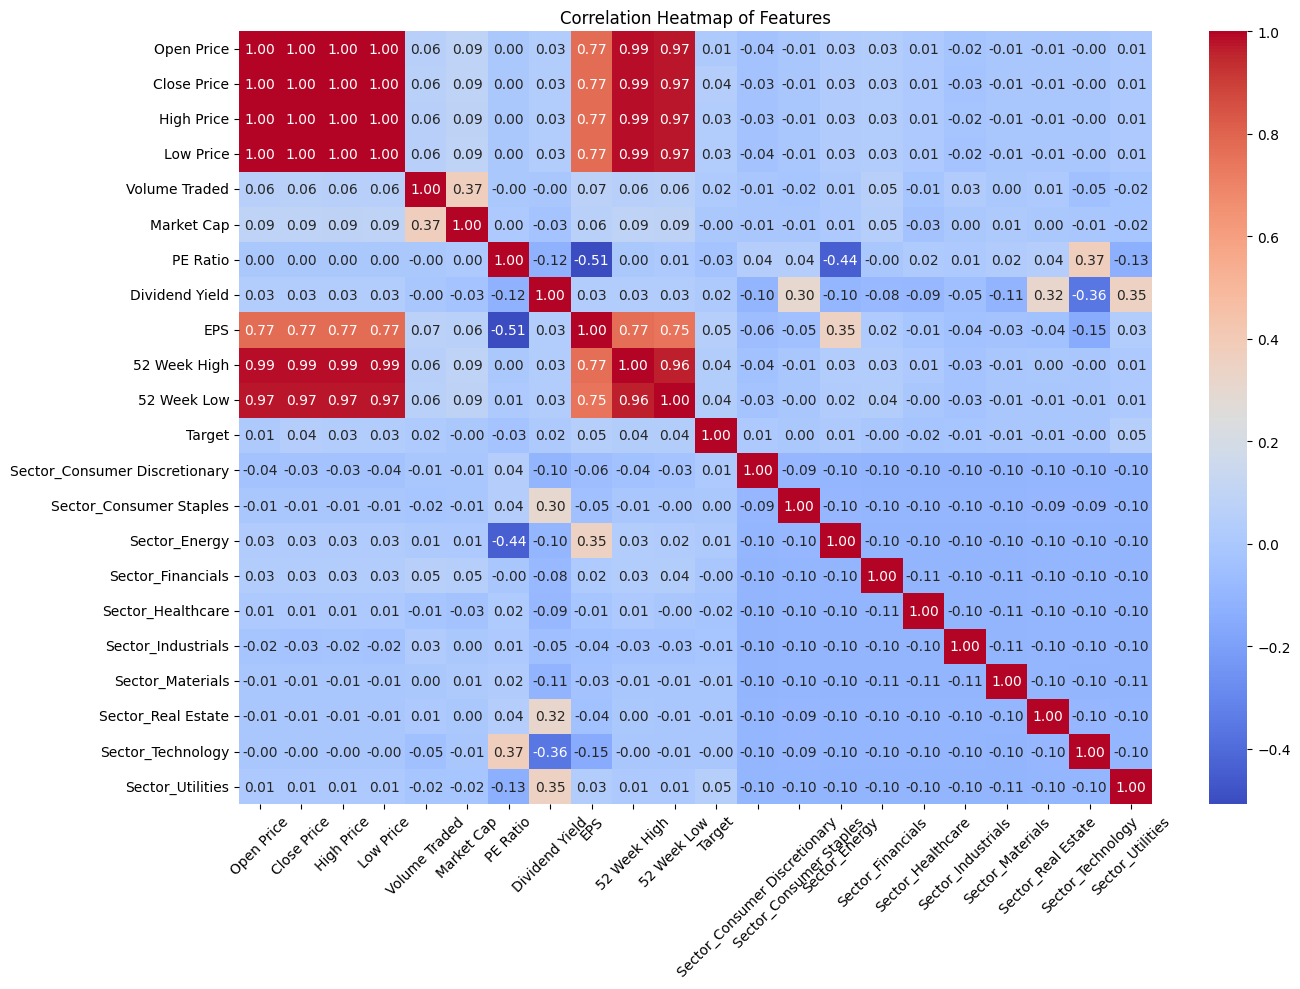

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#  Create a binary target variable
df['Target'] = (df['Close Price'] > df['Open Price']).astype(int)

# Drop unnecessary columns
df_model = df.drop(columns=['Date', 'Ticker'])  
df_model = pd.get_dummies(df_model, columns=['Sector'], drop_first=True)  

# Correlation matrix to understand feature relationships
correlation_matrix = df_model.corr()

# Plotting correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Feature-Target Split
X = df_model.drop(columns=['Target', 'Close Price']) 
y = df_model['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluate
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    model_results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }

results_df = pd.DataFrame(model_results).T
results_df.sort_values(by="F1 Score", ascending=False)


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.583569,0.581281,0.655556,0.616188
Random Forest,0.524079,0.530612,0.577778,0.553191
Decision Tree,0.526912,0.534759,0.555556,0.544959
SVM,0.467422,0.478947,0.505556,0.491892


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Best Params (Random Forest):", grid_rf.best_params_)

best_rf_model = grid_rf.best_estimator_
rf_preds = best_rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_preds))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params (Random Forest): {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       173
           1       0.53      0.60      0.56       180

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameters
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
    'solver': ['lbfgs', 'liblinear']
}

grid_logreg = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_logreg,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_logreg.fit(X_train, y_train)

print("🔍 Best Params (Logistic Regression):", grid_logreg.best_params_)

best_logreg = grid_logreg.best_estimator_
logreg_preds = best_logreg.predict(X_test)

from sklearn.metrics import classification_report
print(" Logistic Regression Report:\n", classification_report(y_test, logreg_preds))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔍 Best Params (Logistic Regression): {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
📊 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       173
           1       0.89      0.89      0.89       180

    accuracy                           0.89       353
   macro avg       0.89      0.89      0.89       353
weighted avg       0.89      0.89      0.89       353



Logistic Reasoning is the best model.